---
title: TRABAJO PRÁCTICO N° 1
subtitle: UN PRIMER ENCUENTRO CON LA EPH
author: Martin Cargnel
date-format: "MMM, YYYY"
lang: es
execute:
  echo: true
  include: false
  fig-align: center
format:
  pdf:
    documentclass: scrartcl
    toc-depth: 2
    number-sections: true
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

Link al repositorio: https://github.com/mcargnel/Big-Data-UBA-Grupo-001/tree/main/TP1

# Familiarizandonos con la base EPH y limpieza

## Breve introducción a la base
En este trabajo se utilizará la encuesta permanente de hogares para hacer una limpieza de datos y sentar las bases para un estudio sobre las personas pobres. La identificación de personas pobres en la EPH se realiza comparando el ingreso total familiar (ITF) del hogar con el valor de la Canasta Básica Total (CBT) correspondiente al período y ajustada por el número de adultos equivalentes en el hogar. Si el ITF es menor al ingreso necesario para cubrir la CBT según la composición del hogar, se considera que las personas de ese hogar son pobres. Este método permite tener en cuenta tanto el tamaño como la estructura etaria y de género del hogar, ajustando el umbral de pobreza a las necesidades reales de consumo.

Para ello, se utilizarán los primeros trimestres de 2005 y 2025 para la región de Gran Buenos Aires.

In [25]:
#df_usu_hogar = pd.read_excel('data/usu_hogar_T125.xlsx')
df_individual_t105 = pd.read_stata('data/Individual_t105.dta')
df_individual_t125 = pd.read_excel('data/usu_individual_T125.xlsx')

Uniendo estos períodos se obtiene un dataset de 16.665 filas, donde cada una corresponde a un individuo. Sin embargo, a continuación se procederá a realizar una limpieza de estos datos.

In [26]:
df_individual_t125.columns = df_individual_t125.columns.str.lower()
df_individual_t105.columns = df_individual_t105.columns.str.lower()
df_individual_t105_filt = df_individual_t105[df_individual_t105['region'] == 'Gran Buenos Aires']

df_individual_t125_filt = df_individual_t125[df_individual_t125['region'] == 1]

df_total = pd.concat([df_individual_t105_filt, df_individual_t125_filt])

df_total.shape

(16665, 243)

In [27]:
variables_identificatorias = ['CODUSU', 'nro_hogar', 'componente']

variables_dadas = ['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']

variables_elegidas = ['PP04A', 'PP05B2_ANO', 'pp07c','pp07g_59','ITF','pp07j','PP11O']

total_variables = variables_identificatorias + variables_dadas + variables_elegidas
total_variables = [i.lower() for i in total_variables]
len(total_variables)

18

In [28]:
df_total = df_total[['ano4']+total_variables]

Las variables utilizadas en el análisis son las siguientes: **CODUSU**: Código que permite identificar de manera única cada vivienda, **nro_hogar**: Código que distingue a los diferentes hogares dentro de una misma vivienda, **componente**: Número de orden asignado a cada persona dentro del hogar, **ch04**: Sexo de la persona, **ch06**: Edad de la persona, **ch07**: Estado civil, **ch08**: Tipo de cobertura de salud, **nivel_ed**: Nivel educativo alcanzado, **estado**: Condición de actividad (ocupado, desocupado, inactivo, etc.), **cat_inac**: Categoría de inactividad, en caso de no estar ocupado, **ipcf**: Ingreso per cápita familiar, **pp04a**: Rama de actividad principal en la que trabaja la persona, **pp05b2_ano**: Años de antigüedad en la ocupación actual, **pp07c**: Indica si el empleo tiene fecha de finalización, **pp07g_59**: Señala si el empleo carece de beneficios como vacaciones pagas, aguinaldo, días pagos por enfermedad u obra social, **itf**: Monto del ingreso total familiar, **pp07j**: Turno de trabajo (día, noche, otros) y **pp11o**: Motivo por el cual la persona dejó su trabajo anterior.

Cabe aclarar que, adicionalmente, se realizó una limpieza de las variables para que tengan nombres consistentes entre los dos períodos. La principal diferencia fue que en la tabla de 2025 las respuestas están encodeadas como números, mientras que en la de 2005 las respuestas están tipeadas. Por lo tanto, para mantener la legibilidad, se optó por reemplazar los números por respuestas tipeadas.

In [29]:
df_total['ch04'] = df_total['ch04'].replace({1: 'Varón', 2: 'Mujer'})

In [41]:
df_total['ch06'] = df_total['ch06'].replace({'Menos de 1 año': 0})
df_total['ch06'] = df_total['ch06'].astype(int) 
df_total = df_total.loc[df_total['ch06'] >= 0]

In [43]:
df_total['ch07'] = df_total['ch07'].replace({1: 'Unido', 2: 'Casado', 3: 'Separado o divorciado',
                                             4: 'Viudo', 5:'Soltero'})

In [44]:
df_total['ch08'] = df_total['ch08'].replace({1.0: 'Obra social (incluye PAMI)',
                                             2.0: 'Mutual/Prepaga/Servicio de emergencia',
                                             3.0: 'Planes y seguros públicos',
                                             4.0: 'No paga ni le descuentan',
                                             9.0: 'Ns./Nr.',
                                             12.0: 'Obra social y mutual/prepaga/servicio de emergencia',
                                             123.0: 'Obra social y planes y seguros públicos'
                                             })

In [45]:
df_total['nivel_ed'] = df_total['nivel_ed'].replace({1: 'Primaria Incompleta (incluye educación especial)',
                                                    2: 'Primaria Completa',
                                                    3: 'Secundaria Incompleta',
                                                    4: 'Secundaria Completa',
                                                    5:'Superior Universitaria Incompleta',
                                                    6:'Superior Universitaria Completa',
                                                    7:'Sin instrucción'})

In [46]:
df_total['estado'] = df_total['estado'].replace({1: 'Ocupado',
                                                    2: 'Desocupado',
                                                    3: 'Inactivo',
                                                    4: 'Menor de 10 años',
                                                    0:'Entrevista individual no realizada (no respuesta al cuestion'
                                                    })

In [47]:
df_total['cat_inac'] = df_total['cat_inac'].replace({1: 'Jubilado/pensionado',
                                                    2: 'Rentista',
                                                    3: 'Estudiante',
                                                    4: 'Ama de casa',
                                                    5: 'Menor de 6 años',
                                                    6: 'Discapacitado',
                                                    7: 'Otros'
                                                    })

In [52]:
df_total['pp04a'] = df_total['pp04a'].replace({1.0: 'Estatal',
                                               '...estatal?': 'Estatal',
                                                    2.0: 'Privada?',
                                                    '...privada?':'Privada',
                                                    3.0: 'Otro',
                                                    '...de otro tipo? (especificar)': 'Otro'
                                                    })

In [53]:
df_total['pp07c'] = df_total['pp07c'].replace({1.0: 'Sí (incluye changa, trabajo transitorio, por tarea u obra, s',
                                               2.0: 'No (Incluye permanente, fijo, estable, de planta)',
                                               9.0: 'Ns./Nr.'
                                                })

In [54]:
df_total['pp07j'] = df_total['pp07j'].replace({1.0: 'Dia',
                                               2.0: 'Noche',
                                               3.0:'Otros',
                                               '...de día? (mañana/tarde)': 'Dia',
                                               '...de noche':'Noche',
                                               '...de otro tipo? (rotativo, día y noche, guardias con franco':'Otros'
                                                                                                        })

In [55]:
df_total['pp11o'] = df_total['pp11o'].replace({1.0: 'Despido/cierre',
                                               2.0: 'Por retiro voluntario del sector público',
                                               3.0:'Jubilación',
                                               4.0:'Fin del trabajo temporario/estacional',
                                               5.0:'Le pagaban poco/no le pagaban',
                                               6.0:'Malas relaciones laborales/malas condiciones de trabajo (ins',
                                               7:'Renuncia obligada/pactada',
                                               8.0: 'Otro',
                                               9:'Por razones personales'
                                                })

Luego de limpiar y filtrar los datos, se puede ver en la @tbl-nulos y en la @fig-heatmap-nulos cuantos datos faltantes hay en cada una de las variables incluidas. 

In [57]:
#| label: tbl-nulos
#| tbl-cap: Tabla con valores nulos por variable
#| echo: false
#| include: true

df_total.groupby('ano4').apply(lambda x: x.isna().sum(), include_groups=False).transpose().rename(columns={"ano4":'Variable', 2005.0:'2005', 2025.0:'2025'})

ano4,2005,2025
codusu,0,0
nro_hogar,0,0
componente,0,0
ch04,0,0
ch06,0,0
ch07,0,0
ch08,0,0
nivel_ed,0,0
estado,0,0
cat_inac,0,0


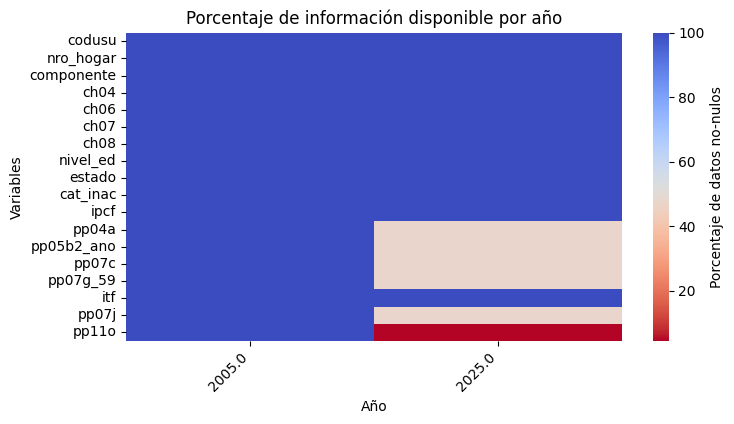

In [78]:
#| label: fig-heatmap-nulos
#| tbl-cap: Heatmap de datos nulos.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

# Calcular el porcentaje de datos no nulos por año
percentage_data = df_total.groupby('ano4').apply(lambda x: x.notnull().mean() * 100,include_groups=False)

# Crear el heatmap sin etiquetas en las celdas
plt.figure(figsize=(8, 4))
sns.heatmap(percentage_data.T, annot=False, cmap="coolwarm_r",cbar_kws={'label': 'Porcentaje de datos no-nulos'})
plt.title("Porcentaje de información disponible por año")
plt.xlabel("Año")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.show()

# Primer Análisis Exploratorio

En la @fig-obs-sexo se puede ver la composición de observaciones por género y año. Si bien la proporción se mantiene similar entre los dos años (mujeres ~52% y varones ~48%), la cantidad total de observaciones es menor en 2025 que en 2005.

In [67]:
df_total['ano4'].value_counts()

ano4
2005.0    9484
2025.0    7139
Name: count, dtype: int64

In [66]:
(
    df_total.groupby(['ano4', 'ch04'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)

ano4    ano4    ch04 
2005.0  2005.0  Mujer    0.525095
                Varón    0.474905
2025.0  2025.0  Mujer    0.521221
                Varón    0.478779
dtype: float64

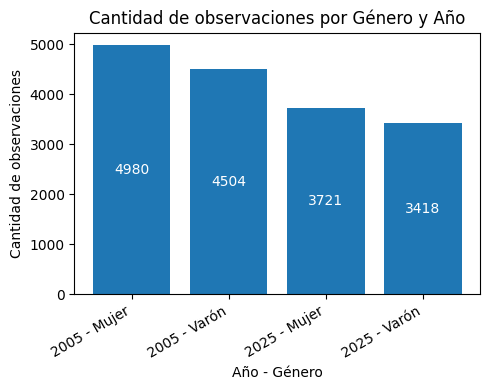

In [ ]:
#| label: fig-obs-sexo
#| tbl-cap: Cantidad de observaciones por sexo.
#| echo: false
#| include: true
#| fig-width: 2
#| fig-height: 1.5

fig, ax = plt.subplots(figsize=(5, 4))

counts = df_total[['ano4', 'ch04']].value_counts().sort_index()
labels = [f"{int(year)} - {sexo}" for year, sexo in counts.index]

bars = ax.bar(labels, counts.values)
ax.set_title("Cantidad de observaciones por Género y Año")
ax.set_xlabel('Año - Género')
ax.set_ylabel('Cantidad de observaciones')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=30, ha='right')

# Agregar etiquetas dentro de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, 
        height / 2, 
        f'{int(height)}', 
        ha='center', va='center', color='white'
    )

plt.tight_layout()
plt.show()


## Matriz de correlación
En la @fig-heatmap-correlaciones se pueden ver las correlaciones entre algunas de las variables incluidas. En particular, se destaca:

- Alta correlación positiva entre "sin instrucción" y "menor de 6 años".
- Alta correlación negativa entre estar soltero y la edad.
- Alta correlación negativa entre no pagar una cobertura de salud y tener obra social (que incluye PAMI).

El único punto que no parece intuitivo sería el último, pero puede explicarse porque PAMI está incluido. El resto de las variables presenta una correlación relativamente baja, lo cual es positivo.

In [69]:
correl_df = df_total[['ch04','ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac','ipcf']]

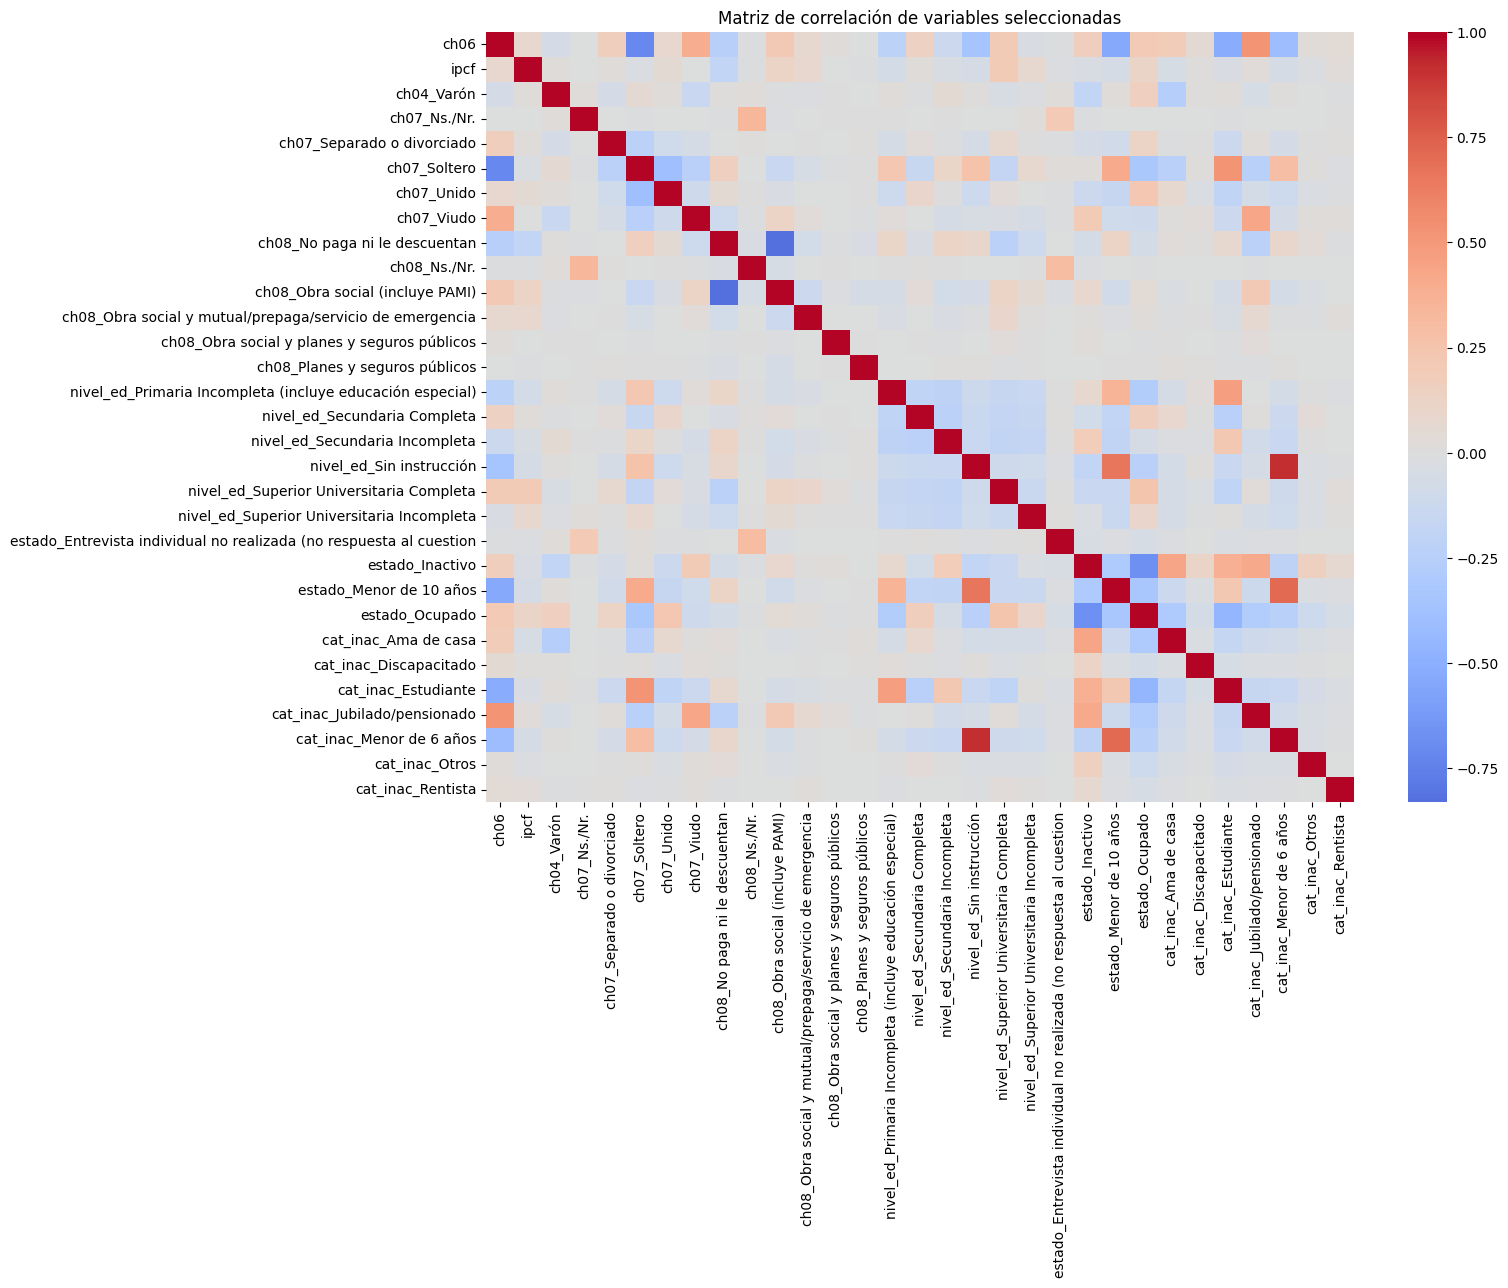

In [71]:
#| label: fig-heatmap-correlaciones
#| tbl-cap: Heatmap de correlaciones entre las variables.
#| echo: false
#| include: true

correl_dummies = pd.get_dummies(correl_df, columns=['ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac'], drop_first=True)

corr_matrix = correl_dummies.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de variables seleccionadas')
plt.show()

# Conociendo a los pobres y no pobres 

Según lo que se vio en esta base, en 2005, 30 personas no respondieron el estado, mientras que en 2025 ese número disminuyó a 21. Sin embargo, si se tiene en cuenta la respuesta a los ingresos, este número aumenta a 2.857 en 2025 y a 113 en 2005.

In [81]:
# personas que no respondieron condicion de actividad
df_total[df_total['estado']== 'Entrevista individual no realizada (no respuesta al cuestion']['ano4'].value_counts()

ano4
2005.0    30
2025.0    21
Name: count, dtype: int64

Para continuar con el análisis se incluyó a la base una variable que tiene los valores de adulto equivalente de cada persona según su sexo y edad. Dicha variable se agregó a nivel hogar y se guardó en una columna llamada ad_equiv_hogar. Luego, se multiplicó por la canasta básica para cada año (2005: $205,07 y 2025: $365.177)y comparó contra el ITF con el objectivo de clasificar como pobres a quienes tengan un ingreso menor a esta métrica.

Por último, puede verse en la @tab-pobres la cantidad y proporción de pobres en ambos períodos. En 2005, el 26,6% de las personas se encontraba bajo la línea de pobreza, mientras que en 2025 este porcentaje aumenta al 31,1%. Esto indica un incremento en la proporción de personas pobres en el Gran Buenos Aires entre ambos períodos. Además, la cantidad total de observaciones es menor en 2025, lo que puede estar relacionado con la mayor cantidad de personas que no respondieron el ingreso total familiar en ese año.

In [113]:
df_tabla_adulto = pd.read_excel('/Users/mcargnel/Documents/mea/Big-Data-UBA-Grupo-001/TP1/data/tabla_adulto_equiv.xlsx', skiprows=3)
df_tabla_adulto.dropna(inplace=True)
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].str.replace(' años', '').replace('año', '')

In [114]:
rangos = [col for col in df_tabla_adulto['Edad'] if ' a ' in col]
tabla_rangos = df_tabla_adulto[df_tabla_adulto['Edad'].isin(rangos)]

rangos_expandidos = []

for _, row in tabla_rangos.iterrows():
    start, end = map(int, row["Edad"].split(" a "))
    for age in range(start, end + 1):
        rangos_expandidos.append({
            "Edad": age,
            "Mujeres": row["Mujeres"],
            "Varones": row["Varones"]
        })

last_row = tabla_rangos.iloc[-1]
for age in range(76, 101):
    rangos_expandidos.append({
        "Edad": age,
        "Mujeres": last_row["Mujeres"],
        "Varones": last_row["Varones"]
    })

rangos_expandidos_df = pd.DataFrame(rangos_expandidos)

In [115]:
df_tabla_adulto = pd.concat([df_tabla_adulto,rangos_expandidos_df])

In [118]:
df_tabla_adulto = df_tabla_adulto[~df_tabla_adulto['Edad'].isin(rangos +['más de 75'])]
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].replace({'1año':1, 'Menor de 1 año': 0})
df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].astype(int)

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_11434/4118338592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].replace({'1año':1, 'Menor de 1 año': 0})
/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_11434/4118338592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tabla_adulto['Edad'] = df_tabla_adulto['Edad'].astype(int)


In [119]:
df_tabla_adulto = df_tabla_adulto.melt(
    id_vars=['Edad'],
    value_vars=['Mujeres', 'Varones'],
    value_name='adulto_equiv',
    var_name='ch04'
)

In [120]:
df_tabla_adulto['ch04'] = df_tabla_adulto['ch04'].replace({'Mujeres': 'Mujer', 'Varones':'Varón'})
df_tabla_adulto.columns = ['ch06', 'ch04', 'adulto_equiv']

In [121]:
df_total = df_total.merge(df_tabla_adulto, on=['ch06', 'ch04'], how='left')

In [93]:
df_total["ad_equiv_hogar"] = (
    df_total.groupby(["codusu", "nro_hogar"])["adulto_equiv"]
      .transform("sum")
)

In [ ]:
# respondieron itf

respondieron = df_total[df_total['itf'] != 0]

# no respondieron itf
norespondieron = df_total[df_total['itf'] == 0]
norespondieron['ano4'].value_counts()

ano4
2025.0    2857
2005.0     113
Name: count, dtype: int64

In [145]:
respondieron['ingreso_necesario'] = np.where(respondieron['ano4'] == 2005.0, respondieron['ad_equiv_hogar'] * 205.07,respondieron['ad_equiv_hogar'] * 365177)  

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_11434/2959864343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = np.where(respondieron['ano4'] == 2005.0, respondieron['ad_equiv_hogar'] * 205.07,respondieron['ad_equiv_hogar'] * 365177)


In [146]:
respondieron['pobre'] = np.where(respondieron['itf'] <respondieron['ingreso_necesario'] , 1, 0)

/var/folders/c6/f1ghz9qx1bbb4_2pszbddg800000gn/T/ipykernel_11434/1349639960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = np.where(respondieron['itf'] <respondieron['ingreso_necesario'] , 1, 0)


In [148]:
#| label: tab-pobres
#| tbl-cap: Tabla con la cantidad y proporción de pobres por año
#| echo: false
#| include: true

pobres_df = respondieron[['ano4','pobre']].value_counts().reset_index().sort_values('ano4')
pobres_df['prop'] = round(pobres_df['count'] /pobres_df.groupby('ano4')['count'].transform('sum'), 4)
pobres_df.columns = ['Año', 'Pobre', 'Cantidad', 'Proporción']
pobres_df

,Año,Pobre,Cantidad,Proporción
0,2005.0,0,6878,0.7340
2,2005.0,1,2493,0.2660
1,2025.0,0,2950,0.6889
3,2025.0,1,1332,0.3111
